# Steel Data Team: King County Housing Market Analysis

## Introduction

The goal of this notebook is to inform KC Real Estate Agency about what factors of a home have the greatest effects on the price. We will be using data from the King County website.

## Business Understanding

__Stakeholder:__  KC Real Estate

__Problem:__  Our Stakeholder needs to tell home owners which home renovations will have the biggest impact on sale price

__Subproblem:__

__Assumptions:__


## Data Understanding

There is 1 csv file that we are getting our data from.  In this section we will explore the data and learn the size and shape of our dataset.  We will also gain an understanding of the housing features presented in this dataset.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import plotly.express as px

In [3]:
# read CSV file
df=pd.read_csv('../../data/kc_house_data.csv')

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Our dataset has 21597 records and 21 columns
- we have 3 columns with missing values

In [6]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [7]:
df_col = list(df.columns)
drop_col = ['yr_renovated', 'date', 'waterfront', 'sqft_basement', 'yr_built', 'zipcode']
df_rcol = list(set(df_col) - set(drop_col))
len(df_col)

21

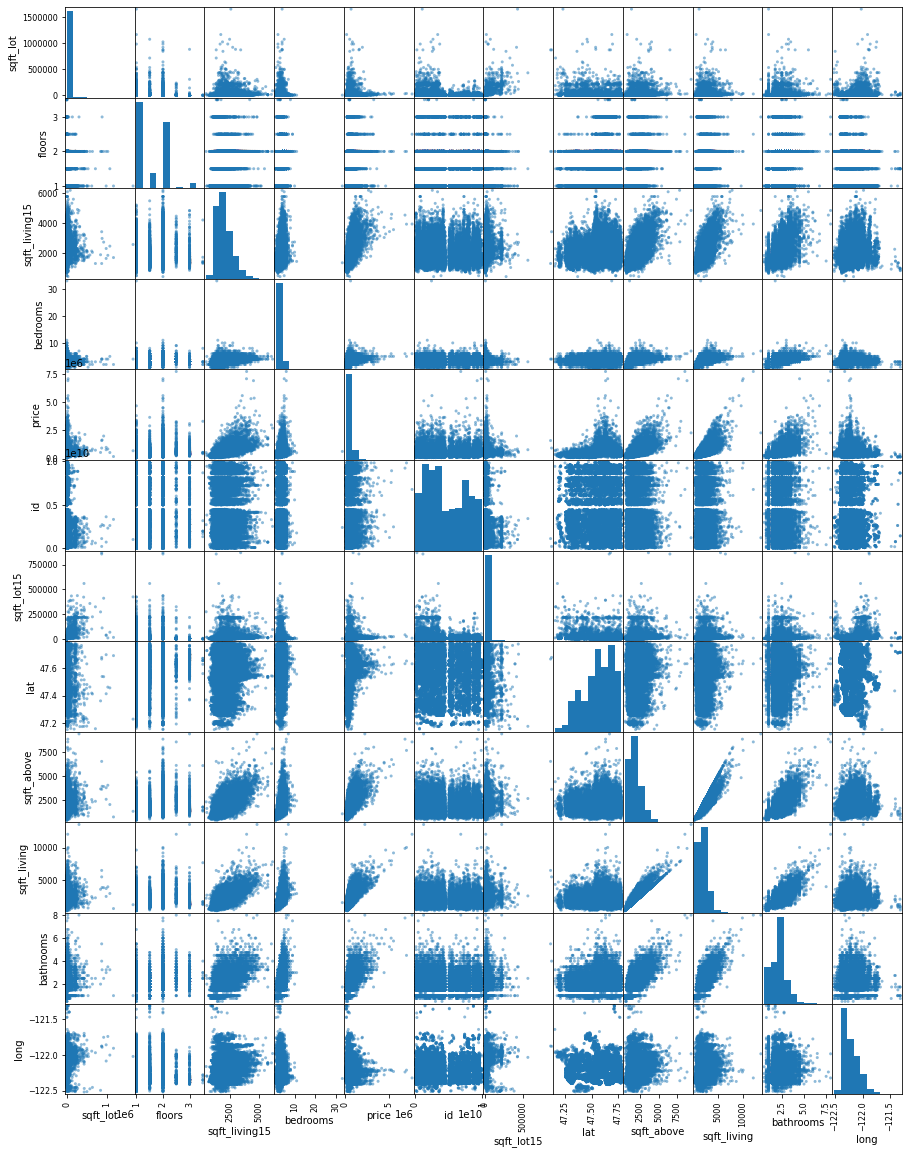

In [8]:
# Distributions of variables
pd.plotting.scatter_matrix(df[df_rcol], figsize=(15,20));
# features that need log transform: bathrooms, sqft_living, sqft_lot*, floors*, view*, condition*,
#sqft_above, yr_built, sqft_living15, sqft_lot15, 

Note that the mean for 'bedrooms' 3.37 and the max for bedrooms is 33.  This is an easy outlier to spot. 

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

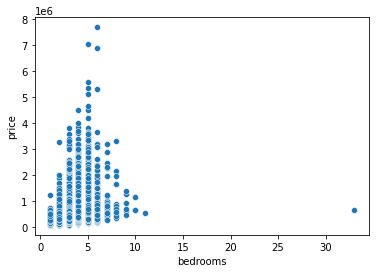

In [9]:
# look for outliers
sns.scatterplot(df['bedrooms'],df['price'])


In [10]:
# look for the specifics of that outlier
df.loc[df['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
15856      6000     1.0         NO  NONE  ...  7 Average       1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

The house with 33 bedrooms only costs $640,000.  Also this house has 1.75 bathrooms.  This record holds an outlier and the rest of the features do not add up.  We will drop this outlier from our dataset.

In [11]:
# we will drop this outlier by using the record index.
df=df.drop(15856)

Check to see if we dropped the right record.

In [12]:
df.describe()


id         price      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.402920e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.673760e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  17754.000000   
mean   1.509983e+04      1.494119   1788.631506   1971.000787     83.641489   
std    4.141355e+04      0.539685    827.763251     29.375460    399.957185   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.619000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068550e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21596.000000  21596.000000  21596.000000   21596.000000   21596.000000  
mean   98077.950685     47.560087   -122.213977    1986.650722   12758.656649  
std       53.514040      0.138552      0.140725     685.231768   27275.018316  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

we can confirm that we dropped the right record because max bedrooms is now 11.

#### Lets check the correlation between one of our features and 'price'

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

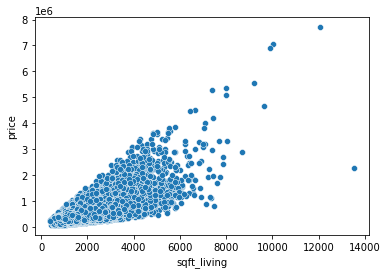

In [13]:
sns.scatterplot(df['sqft_living'],df['price'])

In [14]:
# look for the outlier on the far right
df.loc[df['sqft_living']== 13540].T

12764
id             1225069038
date             5/5/2014
price            2.28e+06
bedrooms                7
bathrooms               8
sqft_living         13540
sqft_lot           307752
floors                  3
waterfront             NO
view            EXCELLENT
condition         Average
grade           12 Luxury
sqft_above           9410
sqft_basement      4130.0
yr_built             1999
yr_renovated            0
zipcode             98053
lat               47.6675
long             -121.986
sqft_living15        4850
sqft_lot15         217800

This is a huge outlier in regards to 'sqft_living', so we are going to drop it.

In [15]:
# We again drop this record by using the record the index
df.drop(12764, inplace=True)

In [16]:
# Confirm that the record(12764) has been dropped from our dataframe.
df[12763:12766]

id       date     price  bedrooms  bathrooms  sqft_living  \
12763  7228500610  3/30/2015  510000.0         2        1.0         1070   
12765  5162100650  9/22/2014  316000.0         4        2.5         2320   
12766  3904902510  5/12/2014  690000.0         4        2.5         2670   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
12763      5280     1.0         NO  NONE  ...  6 Low Average       1070   
12765      7379     2.0         NO  NONE  ...         8 Good       2320   
12766     13463     2.0         NO  NONE  ...       9 Better       2670   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12763            0.0     1900           NaN    98122  47.6168 -122.303   
12765            0.0     1987           0.0    98003  47.3432 -122.316   
12766              ?     1989           0.0    98029  47.5627 -122.018   

       sqft_living15  sqft_lot15  
12763           1380        2370  
12765           2230        7614  
12766           2560       10982  

[3 rows x 21 columns]

In [17]:
# check the one with the highest price
df.loc[df['price'] == df['price'].max()].T
# this one makes sense and it also look like it's following the trend

7245
id             6762700020
date           10/13/2014
price             7.7e+06
bedrooms                6
bathrooms               8
sqft_living         12050
sqft_lot            27600
floors                2.5
waterfront             NO
view                 GOOD
condition            Good
grade          13 Mansion
sqft_above           8570
sqft_basement      3480.0
yr_built             1910
yr_renovated         1987
zipcode             98102
lat               47.6298
long             -122.323
sqft_living15        3940
sqft_lot15           8800

## Data Cleaning

In [18]:
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      316
Name: view, dtype: int64

In [19]:
# See how many null values are in this column
df['view'].isna().sum()

63

We are going to convert these 63 null values to NONE because the majority of our none values are none

In [20]:
# fill in the null values with None, assuming sometimes people don't fill it in when there's minimum view
df['view'] = df['view'].fillna('NONE')

In [21]:
# check our work
df['view'].isna().sum()

0

##### Convert categoricals into int or float values

the view column has categorical data.  We can easily convert this into numeric data with dictionary mapping.

In [22]:
# Map our string values to numeric values
view_dict = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_dict, inplace=True)

In [23]:
# check to see if there's null values in the column
df['condition'].isna().sum()

0

In [24]:
df['condition'].value_counts()

Average      14019
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [25]:
# # Create dictionary for mapping onto condition
cond_dict = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}

In [26]:
# Replace categorical values with numeric values
df['condition'].replace(cond_dict, inplace=True)

In [27]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          88
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8973
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

In [28]:
# mapped dicitonary to change grade to numeric values
grade_dict = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}
df['grade'].replace(grade_dict, inplace=True)

In [29]:
df['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [30]:
df['waterfront'].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

In [31]:
df['waterfront'].isna().sum()

2376

In [32]:
# look at where the houses with missing values in the waterfront column are
fig_waterfront = px.scatter_mapbox(df[df['waterfront'].isna()==True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront.update_layout(mapbox_style='open-street-map')
fig_waterfront.show()

In [33]:
# look at where the houses with YES in the waterfront column are
fig_waterfront_y = px.scatter_mapbox(df[df['waterfront']=='YES'],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront_y.update_layout(mapbox_style='open-street-map')
fig_waterfront_y.show()

The id column does not relate to anything in our analysis so we can drop that column

In [34]:
df.drop('id', axis=1, inplace=True)

In [35]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0        NaN     1          3      7        1180           0.0      1955   
1         NO     1          3      7        2170         400.0      1951   
2         NO     1          3      6         770           0.0      1933   
3         NO     1          5      7        1050         910.0      1965   
4         NO     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

### Visualize home prices to see if there's a pattern

In [36]:
loc_df = df[['lat', 'long', 'price']]

In [37]:
fig = px.scatter_mapbox(loc_df[loc_df['price'] < 2000000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

It seems that the most expensive houses are concentrated around the central point in Lake Washington

In [38]:
# Add a distance column to indicate distance from the central point of seatle 47.6062° N, 122.3321° W
df['distance'] = np.sqrt((df['lat']-47.6101)**2 + (df['long'] + 122.2015)**2)

In [39]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ...  sqft_above  sqft_basement yr_built  \
0        NaN     1          3  ...        1180            0.0     1955   
1         NO     1          3  ...        2170          400.0     1951   
2         NO     1          3  ...         770            0.0     1933   
3         NO     1          5  ...        1050          910.0     1965   
4         NO     1          3  ...        1680            0.0     1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           NaN    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   distance  
0  0.113408  
1  0.161571  
2  0.131625  
3  0.211298  
4  0.156643  

[5 rows x 21 columns]

##### Test Train Split

In [40]:
X = df.drop('price', axis=1)
y= df['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2358    3/25/2015         3       1.00         1040      8122     1.0   
6405     3/4/2015         3       2.50         1880      4499     2.0   
937     10/7/2014         3       2.50         2020      6564     1.0   
19076   1/16/2015         5       4.00         4720    493534     2.0   
18799   6/18/2014         4       2.25         2190      4080     2.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21577   3/17/2015         5       3.75         4170      8142     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15796  12/20/2014         5       2.00         1430      5600     1.5   

      waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
2358          NO     1          5      7        1040           0.0      1971   
6405          NO     1          3      8        1880           0.0      1993   
937           NO     1          3      7        1310         710.0      1994   
19076         NO     1          5      9        3960         760.0      1975   
18799         NO     1          3      8        1800         390.0      1918   
...          ...   ...        ...    ...         ...           ...       ...   
11964         NO     1          3      7        2230           0.0      2004   
21577         NO     3          3     10        4170           0.0      2006   
5390          NO     1          4      6        1530           0.0      1976   
860           NO     1          3      5         380           0.0      1963   
15796         NO     1          3      6        1430           0.0      1947   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
2358            0.0    98198  47.3731 -122.312           1470        8676   
6405            0.0    98029  47.5664 -121.999           2130        5114   
937             0.0    98042  47.3545 -122.158           1710        5151   
19076           0.0    98027  47.4536 -122.009           2160      219542   
18799           0.0    98119  47.6425 -122.358           2100        4080   
...             ...      ...      ...      ...            ...         ...   
11964           0.0    98065  47.5308 -121.847           2230        6088   
21577           NaN    98056  47.5354 -122.181           3030        7980   
5390            0.0    98014  47.6492 -121.908           1520        8500   
860             0.0    98168  47.4810 -122.323           1170       15000   
15796           NaN    98118  47.5192 -122.266           1860        5980   

       distance  
2358   0.261494  
6405   0.207162  
937    0.259275  
19076  0.248090  
18799  0.159819  
...         ...  
11964  0.363261  
21577  0.077462  
5390   0.296093  
860    0.177282  
15796  0.111459  

[16196 rows x 20 columns]

### Adding log transformed features to X_train and X_test, eventually making more manageable dfs

In [44]:
# Add logged variables to X_train
var_log = ['bathrooms','sqft_living','sqft_lot', 'floors', 'view', 'condition', 
           'sqft_above','yr_built', 'sqft_living15', 'sqft_lot15']
for var in var_log:
    X_train[var+'_log'] = X_train[var].map(lambda x: np.log(x))
X_train.head()

<ipython-input-44-d6e51ae06709>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2358   3/25/2015         3       1.00         1040      8122     1.0   
6405    3/4/2015         3       2.50         1880      4499     2.0   
937    10/7/2014         3       2.50         2020      6564     1.0   
19076  1/16/2015         5       4.00         4720    493534     2.0   
18799  6/18/2014         4       2.25         2190      4080     2.0   

      waterfront  view  condition  grade  ...  bathrooms_log sqft_living_log  \
2358          NO     1          5      7  ...       0.000000        6.946976   
6405          NO     1          3      8  ...       0.916291        7.539027   
937           NO     1          3      7  ...       0.916291        7.610853   
19076         NO     1          5      9  ...       1.386294        8.459564   
18799         NO     1          3      8  ...       0.810930        7.691657   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
2358       9.002332    0.000000       0.0       1.609438        6.946976   
6405       8.411610    0.693147       0.0       1.098612        7.539027   
937        8.789355    0.000000       0.0       1.098612        7.177782   
19076     13.109347    0.693147       0.0       1.609438        8.283999   
18799      8.313852    0.693147       0.0       1.098612        7.495542   

       yr_built_log  sqft_living15_log  sqft_lot15_log  
2358       7.586296           7.293018        9.068316  
6405       7.597396           7.663877        8.539737  
937        7.597898           7.444249        8.546946  
19076      7.588324           7.677864       12.299299  
18799      7.559038           7.649693        8.313852  

[5 rows x 30 columns]

In [45]:
# Add logged variables to X_test
var_log = ['bathrooms','sqft_living','sqft_lot', 'floors', 'view', 'condition', 
           'sqft_above','yr_built', 'sqft_living15', 'sqft_lot15']
for var in var_log:
    X_test[var+'_log'] = X_test[var].map(lambda x: np.log(x))
X_test.head()

<ipython-input-45-0f30b6e232dc>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3686   2/20/2015         3       0.75          850      8573     1.0   
10246   5/6/2014         3       1.00         1510      6083     1.0   
4037   3/25/2015         4       2.25         1790     42000     1.0   
3437   2/17/2015         2       1.50         1140      2500     1.0   
19291  5/23/2014         3       1.00         1500      3920     1.0   

      waterfront  view  condition  grade  ...  bathrooms_log sqft_living_log  \
3686          NO     1          3      6  ...      -0.287682        6.745236   
10246         NO     1          4      6  ...       0.000000        7.319865   
4037          NO     1          3      7  ...       0.810930        7.489971   
3437          NO     2          3      7  ...       0.405465        7.038784   
19291         NO     1          3      7  ...       0.000000        7.313220   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
3686       9.056373         0.0  0.000000       1.098612        6.396930   
10246      8.713253         0.0  0.000000       1.386294        6.756932   
4037      10.645425         0.0  0.000000       1.098612        7.064759   
3437       7.824046         0.0  0.693147       1.098612        6.445720   
19291      8.273847         0.0  0.000000       1.098612        6.907755   

       yr_built_log  sqft_living15_log  sqft_lot15_log  
3686       7.573017           6.745236        9.033842  
10246      7.570443           7.319865        8.650325  
4037       7.592366           7.630461       10.821657  
3437       7.594884           7.313220        8.517193  
19291      7.574045           7.402452        8.298291  

[5 rows x 30 columns]

In [55]:
# Making a data frame including the potentially useful variables, including logged variables, for X_train
# logged variables: bathrooms, sqft_living, sqft_lot*, floors*, view*, condition*,
# sqft_above, yr_built, sqft_living15, sqft_lot15,
# variables used in mult lin reg that aren't logged: bedrooms, grade, distance
log_X_train = X_train[['bedrooms', 'grade', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log', 'floors_log', 'view_log',
                      'condition_log', 'sqft_above_log', 'yr_built_log', 'sqft_living15_log', 'sqft_lot15_log', 'distance']]

In [56]:
# Making a data frame including the potentially useful variables, including logged variables, for X_test
# logged variables: bathrooms, sqft_living, sqft_lot*, floors*, view*, condition*,
# sqft_above, yr_built, sqft_living15, sqft_lot15,
# variables used in mult lin reg that aren't logged: bedrooms, grade, distance
log_X_test = X_test[['bedrooms', 'grade', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log', 'floors_log', 'view_log',
                      'condition_log', 'sqft_above_log', 'yr_built_log', 'sqft_living15_log', 'sqft_lot15_log', 'distance']]

In [57]:
# Combine log_X_train with y_train
log_dftrain = pd.concat([y_train, log_X_train], axis=1)
log_dftrain.head()

price  bedrooms  grade  bathrooms_log  sqft_living_log  \
2358   234000.0         3      7       0.000000         6.946976   
6405   529000.0         3      8       0.916291         7.539027   
937    253000.0         3      7       0.916291         7.610853   
19076  745000.0         5      9       1.386294         8.459564   
18799  855000.0         4      8       0.810930         7.691657   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
2358       9.002332    0.000000       0.0       1.609438        6.946976   
6405       8.411610    0.693147       0.0       1.098612        7.539027   
937        8.789355    0.000000       0.0       1.098612        7.177782   
19076     13.109347    0.693147       0.0       1.609438        8.283999   
18799      8.313852    0.693147       0.0       1.098612        7.495542   

       yr_built_log  sqft_living15_log  sqft_lot15_log  distance  
2358       7.586296           7.293018        9.068316  0.261494  
6405       7.597396           7.663877        8.539737  0.207162  
937        7.597898           7.444249        8.546946  0.259275  
19076      7.588324           7.677864       12.299299  0.248090  
18799      7.559038           7.649693        8.313852  0.159819

In [58]:
# Combine log_X_test with y_test
log_dftest = pd.concat([y_test, log_X_test], axis=1)

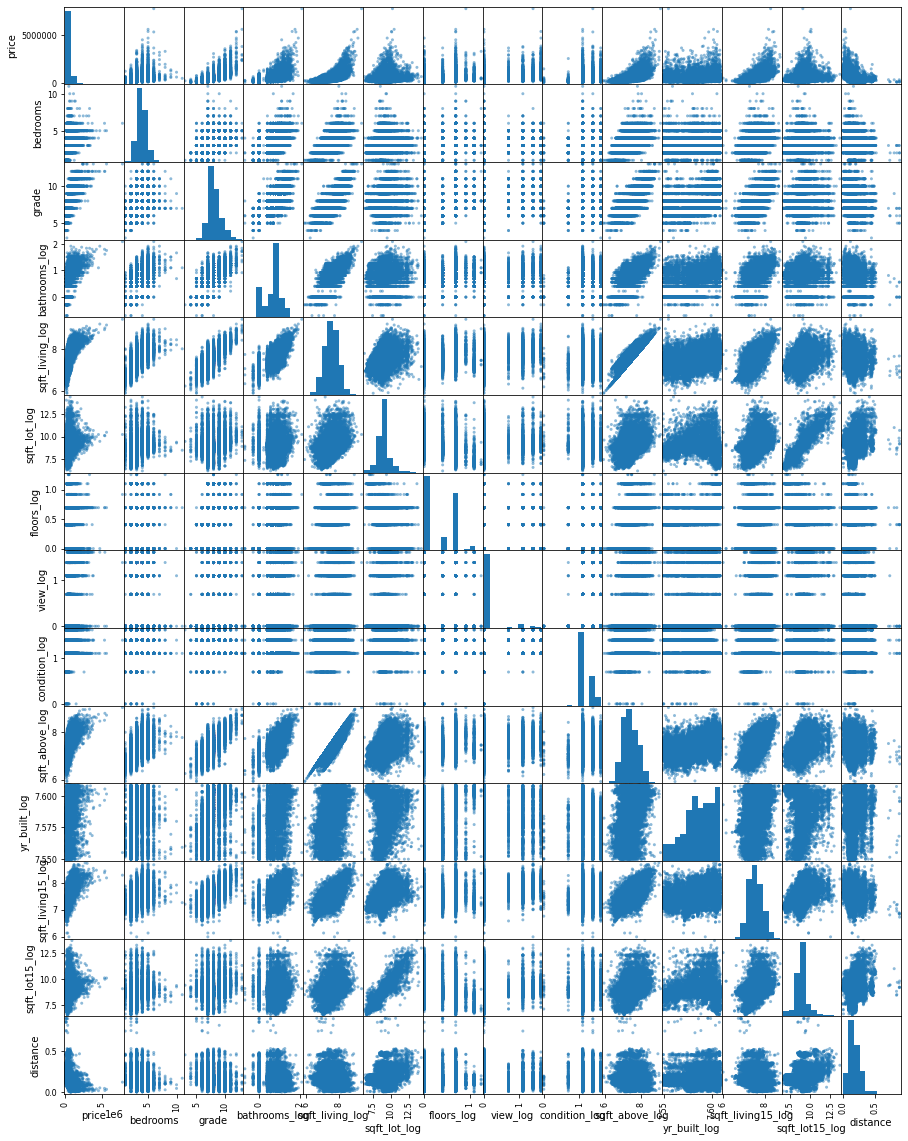

In [59]:
# Distributions after some log transformations
pd.plotting.scatter_matrix(log_dftrain, figsize=(15,20));

## Modeling

### Baseline Model

In [60]:
base_train_mean = y_train.mean()
base_train_mean

543303.2574709805

In [61]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [62]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.001164501892552794
----
Train RMSE: 368714.2955544344
Test RMSE: 362612.29141276295


Interpretation: The baseline model predicts that every house has the value of the mean in this area. The model has very low R2 (close to zero) and the prediction is off by 362 thousand dollars on average.

### Explore Variables

In [63]:
# make a dataframe for our training data
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

price        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
2358    234000.0   3/25/2015         3       1.00         1040      8122   
6405    529000.0    3/4/2015         3       2.50         1880      4499   
937     253000.0   10/7/2014         3       2.50         2020      6564   
19076   745000.0   1/16/2015         5       4.00         4720    493534   
18799   855000.0   6/18/2014         4       2.25         2190      4080   
...          ...         ...       ...        ...          ...       ...   
11964   440000.0   9/15/2014         3       2.50         2230      5800   
21577  1090000.0   3/17/2015         5       3.75         4170      8142   
5390    299800.0   7/21/2014         4       1.50         1530      9000   
860     245000.0   6/20/2014         1       0.75          380     15000   
15796   133000.0  12/20/2014         5       2.00         1430      5600   

       floors waterfront  view  condition  ...  bathrooms_log  \
2358      1.0         NO     1          5  ...       0.000000   
6405      2.0         NO     1          3  ...       0.916291   
937       1.0         NO     1          3  ...       0.916291   
19076     2.0         NO     1          5  ...       1.386294   
18799     2.0         NO     1          3  ...       0.810930   
...       ...        ...   ...        ...  ...            ...   
11964     2.0         NO     1          3  ...       0.916291   
21577     2.0         NO     3          3  ...       1.321756   
5390      1.0         NO     1          4  ...       0.405465   
860       1.0         NO     1          3  ...      -0.287682   
15796     1.5         NO     1          3  ...       0.693147   

       sqft_living_log sqft_lot_log  floors_log  view_log  condition_log  \
2358          6.946976     9.002332    0.000000  0.000000       1.609438   
6405          7.539027     8.411610    0.693147  0.000000       1.098612   
937           7.610853     8.789355    0.000000  0.000000       1.098612   
19076         8.459564    13.109347    0.693147  0.000000       1.609438   
18799         7.691657     8.313852    0.693147  0.000000       1.098612   
...                ...          ...         ...       ...            ...   
11964         7.709757     8.665613    0.693147  0.000000       1.098612   
21577         8.335671     9.004791    0.693147  1.098612       1.098612   
5390          7.333023     9.104980    0.000000  0.000000       1.386294   
860           5.940171     9.615805    0.000000  0.000000       1.098612   
15796         7.265430     8.630522    0.405465  0.000000       1.098612   

       sqft_above_log  yr_built_log  sqft_living15_log  sqft_lot15_log  
2358         6.946976      7.586296           7.293018        9.068316  
6405         7.539027      7.597396           7.663877        8.539737  
937          7.177782      7.597898           7.444249        8.546946  
19076        8.283999      7.588324           7.677864       12.299299  
18799        7.495542      7.559038           7.649693        8.313852  
...               ...           ...                ...             ...  
11964        7.709757      7.602900           7.709757        8.714075  
21577        8.335671      7.603898           8.016318        8.984694  
5390         7.333023      7.588830           7.326466        9.047821  
860          5.940171      7.582229           7.064759        9.615805  
15796        7.265430      7.574045           7.528332        8.696176  

[16196 rows x 31 columns]

In [64]:
# pick the variables we are interested in and numeric
# see correlations between them and the target
df_explore=df_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement'],axis=1)

In [65]:
df_explore.corr()['price'].sort_values(ascending=False)

price                1.000000
sqft_living          0.703730
grade                0.669421
sqft_living_log      0.615518
sqft_above           0.603381
sqft_living15        0.590540
sqft_living15_log    0.548887
sqft_above_log       0.544320
bathrooms            0.529581
bathrooms_log        0.459973
view                 0.399880
view_log             0.389445
bedrooms             0.318156
floors_log           0.264530
floors               0.254563
sqft_lot_log         0.163451
sqft_lot15_log       0.149032
yr_renovated         0.131064
sqft_lot             0.084421
sqft_lot15           0.080234
yr_built             0.049700
yr_built_log         0.048447
condition_log        0.041768
condition            0.041514
distance            -0.359506
Name: price, dtype: float64

In [66]:
log_X_test.head()

bedrooms  grade  bathrooms_log  sqft_living_log  sqft_lot_log  \
3686          3      6      -0.287682         6.745236      9.056373   
10246         3      6       0.000000         7.319865      8.713253   
4037          4      7       0.810930         7.489971     10.645425   
3437          2      7       0.405465         7.038784      7.824046   
19291         3      7       0.000000         7.313220      8.273847   

       floors_log  view_log  condition_log  sqft_above_log  yr_built_log  \
3686          0.0  0.000000       1.098612        6.396930      7.573017   
10246         0.0  0.000000       1.386294        6.756932      7.570443   
4037          0.0  0.000000       1.098612        7.064759      7.592366   
3437          0.0  0.693147       1.098612        6.445720      7.594884   
19291         0.0  0.000000       1.098612        6.907755      7.574045   

       sqft_living15_log  sqft_lot15_log  distance  
3686            6.745236        9.033842  0.187991  
10246           7.319865        8.650325  0.149962  
4037            7.630461       10.821657  0.475123  
3437            7.313220        8.517193  0.162353  
19291           7.402452        8.298291  0.169154

In [67]:
log_X_train.drop(['yr_built_log','condition_log'], axis=1, inplace=True)

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
log_X_test.drop(['yr_built_log','condition_log'], axis=1, inplace=True)

In [69]:
log_dftrain.corr()['price'].sort_values(ascending=False)

price                1.000000
grade                0.669421
sqft_living_log      0.615518
sqft_living15_log    0.548887
sqft_above_log       0.544320
bathrooms_log        0.459973
view_log             0.389445
bedrooms             0.318156
floors_log           0.264530
sqft_lot_log         0.163451
sqft_lot15_log       0.149032
yr_built_log         0.048447
condition_log        0.041768
distance            -0.359506
Name: price, dtype: float64

<AxesSubplot:>

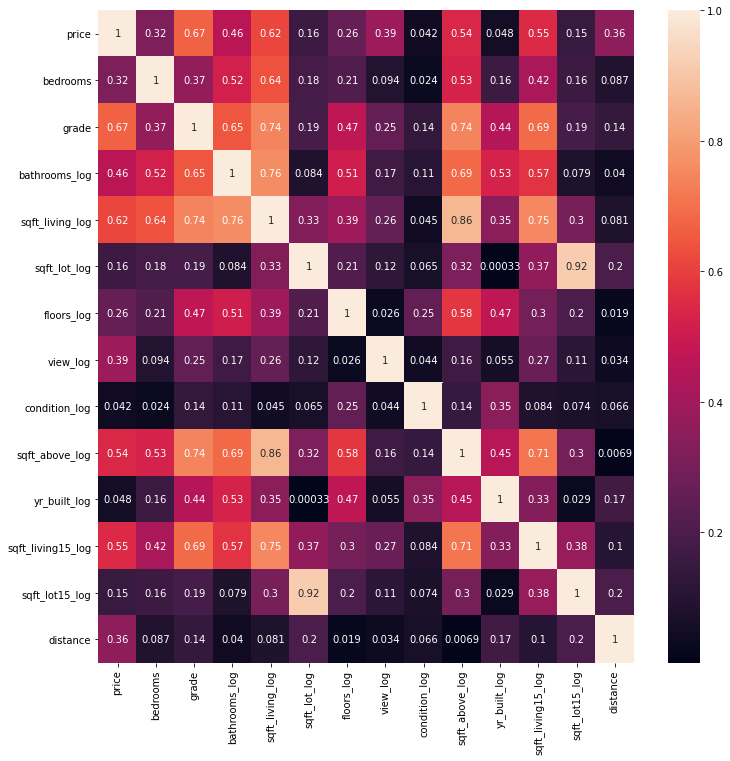

In [70]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(log_dftrain.corr().abs(), annot=True)

### log_dftrain Multiple Lin Reg

In [71]:
# Getting the variable names for formula
log_multform = 'price ~ ' + "+".join(log_X_train.columns)
log_multform

'price ~ bedrooms+grade+bathrooms_log+sqft_living_log+sqft_lot_log+floors_log+view_log+sqft_above_log+sqft_living15_log+sqft_lot15_log+distance'

In [72]:
# Fit the model
log_multmodel = ols(formula=log_multform, data=log_dftrain).fit()

In [73]:
log_multmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2233.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:48:09   Log-Likelihood:            -2.2310e+05
No. Observations:               16196   AIC:                         4.462e+05
Df Residuals:                   16184   BIC:                         4.463e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -2.22e+06    6.4e+04    -34.713      0.000   -2.35e+06   -2.09e+06
bedrooms          -1.707e+04   2719.161     -6.277      0.000   -2.24e+04   -1.17e+04
grade               1.24e+05   2697.505     45.977      0.000    1.19e+05    1.29e+05
bathrooms_log     -4.827e+04   8000.897     -6.033      0.000    -6.4e+04   -3.26e+04
sqft_living_log    2.399e+05   1.21e+04     19.825      0.000    2.16e+05    2.64e+05
sqft_lot_log        2.47e+04   5249.502      4.706      0.000    1.44e+04     3.5e+04
floors_log        -5470.6982   8016.452     -0.682      0.495   -2.12e+04    1.02e+04
view_log           2.157e+05   5379.188     40.104      0.000    2.05e+05    2.26e+05
sqft_above_log     2.628e+04   1.11e+04      2.368      0.018    4530.592     4.8e+04
sqft_living15_log  -623.5294   9320.683     -0.067      0.947   -1.89e+04    1.76e+04
sqft_lot15_log      -1.4e+04   5732.514     -2.443      0.015   -2.52e+04   -2768.364
distance          -1.191e+06   2.21e+04    -53.793      0.000   -1.23e+06   -1.15e+06
==============================================================================
Omnibus:                    15198.746   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1827006.436
Skew:                           4.155   Prob(JB):                         0.00
Kurtosis:                      54.364   Cond. No.                         709.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

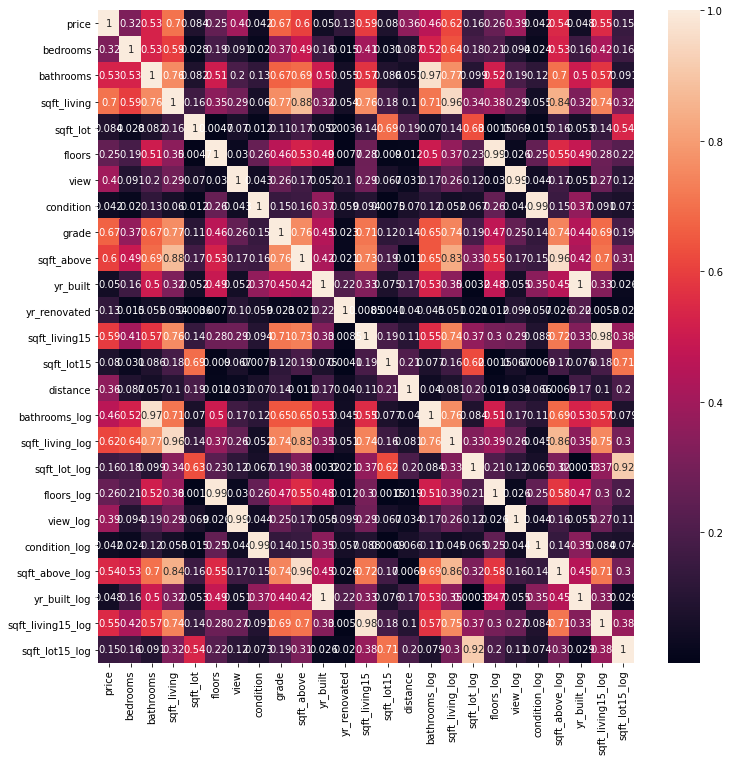

In [74]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_explore.corr().abs(), annot=True)


#### There is multicollinearity between:####
    *grade, sqft_above, and sqft_living15*
    *yr_renovated and distance*
    *bedrooms and floors*
#### Columns to not include in future models due to low correlation with price:####
    *sqft_lot15, yr_renovated, yr_built, condition, sqft_lot*

### Simple Model

Model the variable that has the highest correlation with price, which is sqft_living

In [75]:
simple_formula='price ~ sqft_living'
simple_model = ols(simple_formula, df_train).fit()
simple_model_summ = simple_model.summary()
simple_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:48:47   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.726e+04   5117.509     -9.236      0.000   -5.73e+04   -3.72e+04
sqft_living   283.3842      2.248    126.049      0.000     278.977     287.791
==============================================================================
Omnibus:                    10297.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273144.164
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      22.422   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
simple_train_preds=simple_model.predict(X_train)
simple_test_preds=simple_model.predict(X_test)

In [77]:
print(f"Train R2: {r2_score(y_train, simple_train_preds)}")
print(f"Test R2: {r2_score(y_test, simple_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, simple_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, simple_test_preds, squared = False)}")



Train R2: 0.4952362517108303
Test R2: 0.48516570404881865
----
Train RMSE: 261959.4406716326
Test RMSE: 260030.04727585672


Interpretation: The simple model is a big improvement from the baseline. R2 is 0.50 for training data and 0.49 for testing data and the prediction is off by around 260 thousand dollars on average. The R2 is still low and the RMSE is still too high. Model needs iteration.

#### Since we are doing a lot of assessment of our models, we can use a function for this repetitive work

In [78]:
def assess(model):
    
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

Check to see if the function works

Train R2: 0.4952362517108303
Test R2: 0.48516570404881865
----
Train RMSE: 261959.4406716326
Test RMSE: 260030.04727585672
----
Train MAE: 174968.58987369286
Test MAE: 172486.36266115913


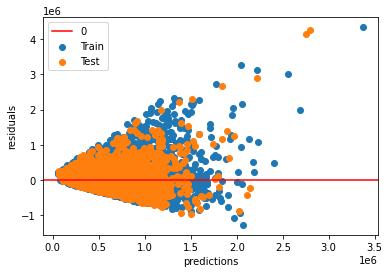

In [79]:
assess(simple_model)

### Multiple Linear Regression

In [81]:
df_explore.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
2358   234000.0         3       1.00         1040      8122     1.0     1   
6405   529000.0         3       2.50         1880      4499     2.0     1   
937    253000.0         3       2.50         2020      6564     1.0     1   
19076  745000.0         5       4.00         4720    493534     2.0     1   
18799  855000.0         4       2.25         2190      4080     2.0     1   

       condition  grade  sqft_above  ...  bathrooms_log  sqft_living_log  \
2358           5      7        1040  ...       0.000000         6.946976   
6405           3      8        1880  ...       0.916291         7.539027   
937            3      7        1310  ...       0.916291         7.610853   
19076          5      9        3960  ...       1.386294         8.459564   
18799          3      8        1800  ...       0.810930         7.691657   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
2358       9.002332    0.000000       0.0       1.609438        6.946976   
6405       8.411610    0.693147       0.0       1.098612        7.539027   
937        8.789355    0.000000       0.0       1.098612        7.177782   
19076     13.109347    0.693147       0.0       1.609438        8.283999   
18799      8.313852    0.693147       0.0       1.098612        7.495542   

       yr_built_log  sqft_living15_log  sqft_lot15_log  
2358       7.586296           7.293018        9.068316  
6405       7.597396           7.663877        8.539737  
937        7.597898           7.444249        8.546946  
19076      7.588324           7.677864       12.299299  
18799      7.559038           7.649693        8.313852  

[5 rows x 25 columns]

In [84]:
# Drop unneccesary columns from X_train
X_train_dc = X_train[['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','view', 'condition', 'grade',
                    'sqft_above','yr_built','sqft_living15','sqft_lot15','distance']]

In [85]:
# Drop unneccesary columns for mult regression
X_train_dr = X_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement', 'yr_renovated'],axis=1)

In [86]:
# Make a list of the useful X column names
X_cols = list(X_train_dc.columns)

In [87]:
# Make the formula
mult_form = 'price ~ ' + "+".join(X_cols)
mult_form

'price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+condition+grade+sqft_above+yr_built+sqft_living15+sqft_lot15+distance'

In [88]:
# Fit the model
mult_model = ols(formula=mult_form, data=df_train).fit()

In [89]:
mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2763.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:59:42   Log-Likelihood:            -2.2111e+05
No. Observations:               16196   AIC:                         4.422e+05
Df Residuals:                   16182   BIC:                         4.424e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.972e+06   1.47e+05     33.858      0.000    4.68e+06    5.26e+06
bedrooms      -4.894e+04   2325.310    -21.048      0.000   -5.35e+04   -4.44e+04
bathrooms      4.362e+04   3862.617     11.292      0.000     3.6e+04    5.12e+04
sqft_living     157.5855      5.238     30.087      0.000     147.319     167.852
sqft_lot          0.1540      0.053      2.897      0.004       0.050       0.258
floors         2.066e+04   4172.378      4.951      0.000    1.25e+04    2.88e+04
view           7.771e+04   2318.669     33.515      0.000    7.32e+04    8.23e+04
condition      2.215e+04   2713.560      8.162      0.000    1.68e+04    2.75e+04
grade          9.784e+04   2523.556     38.772      0.000    9.29e+04    1.03e+05
sqft_above       27.2238      5.037      5.405      0.000      17.350      37.097
yr_built      -2803.5698     76.000    -36.889      0.000   -2952.538   -2654.601
sqft_living15     9.0990      3.970      2.292      0.022       1.317      16.881
sqft_lot15       -0.0647      0.084     -0.772      0.440      -0.229       0.100
distance      -9.795e+05   1.99e+04    -49.220      0.000   -1.02e+06    -9.4e+05
==============================================================================
Omnibus:                    12865.783   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           891004.905
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      38.730   Cond. No.                     4.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.6894420719838257
Test R2: 0.6749094309868376
----
Train RMSE: 205476.08689192875
Test RMSE: 206629.33847056242
----
Train MAE: 131424.48234118783
Test MAE: 129187.65662614658


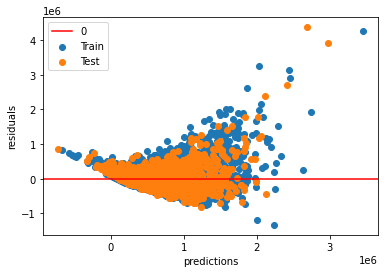

In [90]:
assess(mult_model)

### Scaling and Standardizing the variables of Multiple Linear Regression

In [91]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [92]:
# Assigning a variable to StandardScaler
scaler = StandardScaler()

In [93]:
# Drop unneccesary columns from X_train
X_test_dc = X_test[['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','view', 'condition', 'grade',
                    'sqft_above','yr_built','sqft_living15','sqft_lot15','distance']]

In [94]:
# Fit StandardScaler to training data
scaler.fit(X_train_dc)
# Apply Standardization to train and test data
X_train_dc_sc = scaler.transform(X_train_dc)
X_test_dc_sc = scaler.transform(X_test_dc)

In [95]:
X_train_dc_sc

array([[-0.41272422, -1.45263618, -1.14017884, ..., -0.75604282,
        -0.15049021,  0.88021669],
       [-0.41272422,  0.5001274 , -0.22277886, ...,  0.20235818,
        -0.28123325,  0.26986071],
       [-0.41272422,  0.5001274 , -0.06987887, ..., -0.40753337,
        -0.27987517,  0.855288  ],
       ...,
       [ 0.69397801, -0.80171499, -0.60502885, ..., -0.68343668,
        -0.15695028,  1.26888808],
       [-2.62612868, -1.77809678, -1.8609931 , ..., -1.19167964,
         0.08163191, -0.06579293],
       [ 1.80068024, -0.1507938 , -0.71424314, ..., -0.18971496,
        -0.24944676, -0.80523539]])

In [96]:
# Make the sclaed X_train_dr_sc array a dataframe
X_train_dc_sc = pd.DataFrame(X_train_dc_sc,
                            columns=X_train_dc.columns,
                            index=X_train_dc.index)
X_train_dc_sc.head()

bedrooms  bathrooms  sqft_living   sqft_lot    floors      view  \
2358  -0.412724  -1.452636    -1.140179  -0.166984 -0.918269 -0.304933   
6405  -0.412724   0.500127    -0.222779  -0.252490  0.932553 -0.304933   
937   -0.412724   0.500127    -0.069879  -0.203754 -0.918269 -0.304933   
19076  1.800680   2.452891     2.878907  11.289175  0.932553 -0.304933   
18799  0.693978   0.174667     0.115785  -0.262378  0.932553 -0.304933   

       condition     grade  sqft_above  yr_built  sqft_living15  sqft_lot15  \
2358    2.448058 -0.565942   -0.908852  0.000646      -0.756043   -0.150490   
6405   -0.629305  0.287503    0.105065  0.750130       0.202358   -0.281233   
937    -0.629305 -0.565942   -0.582950  0.784198      -0.407533   -0.279875   
19076   2.448058  1.140947    2.615719  0.136916       0.245922    7.589336   
18799  -0.629305  0.287503    0.008502 -1.804930       0.158794   -0.319186   

       distance  
2358   0.880217  
6405   0.269861  
937    0.855288  
19076  0.729634  
18799 -0.261975

In [97]:
# Combine the scaled train data with y_train
sc_df_train = pd.concat([X_train_dc_sc, y_train], axis=1)

In [98]:
sc_df_train.head()

bedrooms  bathrooms  sqft_living   sqft_lot    floors      view  \
2358  -0.412724  -1.452636    -1.140179  -0.166984 -0.918269 -0.304933   
6405  -0.412724   0.500127    -0.222779  -0.252490  0.932553 -0.304933   
937   -0.412724   0.500127    -0.069879  -0.203754 -0.918269 -0.304933   
19076  1.800680   2.452891     2.878907  11.289175  0.932553 -0.304933   
18799  0.693978   0.174667     0.115785  -0.262378  0.932553 -0.304933   

       condition     grade  sqft_above  yr_built  sqft_living15  sqft_lot15  \
2358    2.448058 -0.565942   -0.908852  0.000646      -0.756043   -0.150490   
6405   -0.629305  0.287503    0.105065  0.750130       0.202358   -0.281233   
937    -0.629305 -0.565942   -0.582950  0.784198      -0.407533   -0.279875   
19076   2.448058  1.140947    2.615719  0.136916       0.245922    7.589336   
18799  -0.629305  0.287503    0.008502 -1.804930       0.158794   -0.319186   

       distance     price  
2358   0.880217  234000.0  
6405   0.269861  529000.0  
937    0.855288  253000.0  
19076  0.729634  745000.0  
18799 -0.261975  855000.0

In [99]:
# Fit a multiple linear regression model based off of scaled features
sc_mult_model = ols(formula=mult_form, data=sc_df_train).fit()

In [100]:
sc_mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2763.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:00:41   Log-Likelihood:            -2.2111e+05
No. Observations:               16196   AIC:                         4.422e+05
Df Residuals:                   16182   BIC:                         4.424e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.433e+05   1615.270    336.354      0.000     5.4e+05    5.46e+05
bedrooms      -4.422e+04   2101.116    -21.048      0.000   -4.83e+04   -4.01e+04
bathrooms       3.35e+04   2967.039     11.292      0.000    2.77e+04    3.93e+04
sqft_living    1.443e+05   4795.816     30.087      0.000    1.35e+05    1.54e+05
sqft_lot       6525.4979   2252.156      2.897      0.004    2111.023    1.09e+04
floors         1.116e+04   2254.337      4.951      0.000    6742.984    1.56e+04
view            5.96e+04   1778.430     33.515      0.000    5.61e+04    6.31e+04
condition      1.439e+04   1763.561      8.162      0.000    1.09e+04    1.79e+04
grade          1.146e+05   2956.907     38.772      0.000    1.09e+05     1.2e+05
sqft_above     2.255e+04   4173.127      5.405      0.000    1.44e+04    3.07e+04
yr_built      -8.229e+04   2230.867    -36.889      0.000   -8.67e+04   -7.79e+04
sqft_living15  6266.0209   2734.204      2.292      0.022     906.679    1.16e+04
sqft_lot15    -1761.3478   2282.779     -0.772      0.440   -6235.847    2713.151
distance      -8.719e+04   1771.429    -49.220      0.000   -9.07e+04   -8.37e+04
==============================================================================
Omnibus:                    12865.783   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           891004.905
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      38.730   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2: -1228389.6359082148
Test R2: -1134182.2752753347
----
Train RMSE: 408656324.58899647
Test RMSE: 385950332.4880875
----
Train MAE: 269579689.7428179
Test MAE: 263885737.74238524


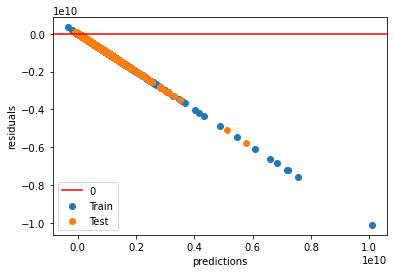

In [101]:
assess(sc_mult_model)

### Make another Multiple Linear Regression Model 
#### Going to drop features which are multicollinear and which have low correlations to price

In [102]:
# Making a new formula to only include features I want
r_mult_form = 'price ~ bedrooms+bathrooms+sqft_living+view+distance'

In [103]:
r_sc_mult_model = ols(formula=r_mult_form, data=sc_df_train).fit()

In [104]:
r_sc_mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     5609.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:01:19   Log-Likelihood:            -2.2244e+05
No. Observations:               16196   AIC:                         4.449e+05
Df Residuals:                   16190   BIC:                         4.449e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.433e+05   1753.078    309.914      0.000     5.4e+05    5.47e+05
bedrooms    -5.397e+04   2216.461    -24.348      0.000   -5.83e+04   -4.96e+04
bathrooms    1.417e+04   2735.115      5.182      0.000    8812.951    1.95e+04
sqft_living  2.483e+05   2982.929     83.235      0.000    2.42e+05    2.54e+05
view         7.366e+04   1844.306     39.940      0.000       7e+04    7.73e+04
distance    -1.092e+05   1764.150    -61.888      0.000   -1.13e+05   -1.06e+05
==============================================================================
Omnibus:                    10985.648   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           452660.756
Skew:                           2.731   Prob(JB):                         0.00
Kurtosis:                      28.317   Cond. No.                         3.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
dc_dftrain = pd.concat([X_train_dc, y_train], axis=1)

In [106]:
dc_dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16196 entries, 2358 to 15796
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16196 non-null  int64  
 1   bathrooms      16196 non-null  float64
 2   sqft_living    16196 non-null  int64  
 3   sqft_lot       16196 non-null  int64  
 4   floors         16196 non-null  float64
 5   view           16196 non-null  int64  
 6   condition      16196 non-null  int64  
 7   grade          16196 non-null  int64  
 8   sqft_above     16196 non-null  int64  
 9   yr_built       16196 non-null  int64  
 10  sqft_living15  16196 non-null  int64  
 11  sqft_lot15     16196 non-null  int64  
 12  distance       16196 non-null  float64
 13  price          16196 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [107]:
# Separating out Data based on view
view_1 = dc_dftrain[dc_dftrain['view'] == 1]
view_2 = dc_dftrain[dc_dftrain['view'] == 2]
view_3 = dc_dftrain[dc_dftrain['view'] == 3]
view_4 = dc_dftrain[dc_dftrain['view'] == 4]
view_5 = dc_dftrain[dc_dftrain['view'] == 5]
view_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14612 entries, 2358 to 15796
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       14612 non-null  int64  
 1   bathrooms      14612 non-null  float64
 2   sqft_living    14612 non-null  int64  
 3   sqft_lot       14612 non-null  int64  
 4   floors         14612 non-null  float64
 5   view           14612 non-null  int64  
 6   condition      14612 non-null  int64  
 7   grade          14612 non-null  int64  
 8   sqft_above     14612 non-null  int64  
 9   yr_built       14612 non-null  int64  
 10  sqft_living15  14612 non-null  int64  
 11  sqft_lot15     14612 non-null  int64  
 12  distance       14612 non-null  float64
 13  price          14612 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 1.7 MB


In [108]:
# Going to make some Linear Regressions between sqft_living and price,
# separated by view
reg_1 = LinearRegression()
reg_2 = LinearRegression()
reg_3 = LinearRegression()
reg_4 = LinearRegression()
reg_5 = LinearRegression()

sqft_living_1 = view_1['sqft_living'].values.reshape(-1, 1)
sqft_living_2 = view_2['sqft_living'].values.reshape(-1, 1)
sqft_living_3 = view_3['sqft_living'].values.reshape(-1, 1)
sqft_living_4 = view_4['sqft_living'].values.reshape(-1, 1)
sqft_living_5 = view_5['sqft_living'].values.reshape(-1, 1)

reg_1.fit(sqft_living_1, view_1['price'])
reg_2.fit(sqft_living_2, view_2['price'])
reg_3.fit(sqft_living_3, view_3['price'])
reg_4.fit(sqft_living_4, view_4['price'])
reg_5.fit(sqft_living_5, view_5['price'])

# Make predictions with the testing set
pred_1 = reg_1.predict(sqft_living_1)
pred_2 = reg_2.predict(sqft_living_2)
pred_3 = reg_3.predict(sqft_living_3)
pred_4 = reg_4.predict(sqft_living_4)
pred_5 = reg_5.predict(sqft_living_5)

# Here are the coefficients
print(reg_1.coef_)
print(reg_2.coef_)
print(reg_3.coef_)
print(reg_4.coef_)
print(reg_5.coef_)

[237.1520465]
[362.81446563]
[296.51051192]
[396.02502512]
[432.57402854]


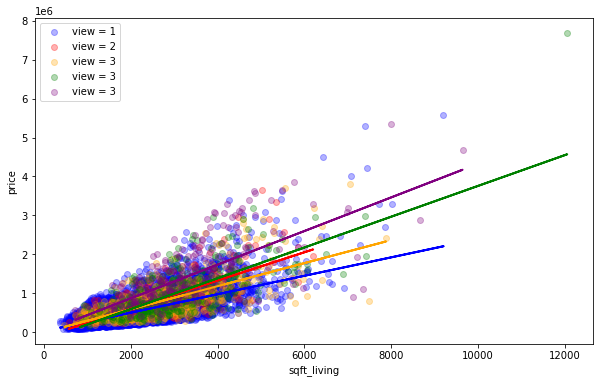

In [109]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(sqft_living_1, view_1['price'],  color='blue', alpha=0.3, label = 'view = 1')
plt.scatter(sqft_living_2, view_2['price'],  color='red', alpha=0.3, label = 'view = 2')
plt.scatter(sqft_living_3, view_3['price'],  color='orange', alpha=0.3, label = 'view = 3')
plt.scatter(sqft_living_4, view_4['price'],  color='green', alpha=0.3, label = 'view = 3')
plt.scatter(sqft_living_5, view_5['price'],  color='purple', alpha=0.3, label = 'view = 3')

plt.plot(sqft_living_1, pred_1, color='blue', linewidth=2)
plt.plot(sqft_living_2, pred_2, color='red', linewidth=2)
plt.plot(sqft_living_3, pred_3, color='orange', linewidth=2)
plt.plot(sqft_living_4, pred_4, color='green', linewidth=2)
plt.plot(sqft_living_5, pred_5, color='purple', linewidth=2)

plt.ylabel('price')
plt.xlabel('sqft_living')
plt.legend();

In [132]:
# Adding new feature to all relevant dataframes
dc_dftrain['view * sqft_living'] = dc_dftrain['view'] * dc_dftrain['sqft_living']
dc_dftrain
X_train_dc['view * sqft_living'] = X_train_dc['view'] * X_train_dc['sqft_living']
X_test_dc['view * sqft_living'] = X_test_dc['view'] * X_test_dc['sqft_living']

<ipython-input-132-819f8cb7dc49>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-819f8cb7dc49>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Simple Model using new "view* sqft_living" variable

In [111]:
v_sql_form = 'price ~ view * sqft_living'

In [112]:
# Simple model using the view*sqft_living variable

v_sql_sm = ols(formula=v_sql_form, data=dc_dftrain).fit()

In [113]:
v_sql_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     6682.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:06:48   Log-Likelihood:            -2.2405e+05
No. Observations:               16196   AIC:                         4.481e+05
Df Residuals:                   16192   BIC:                         4.481e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.192e+04   9416.149      7.638      0.000    5.35e+04    9.04e+04
view             -4.519e+04   6553.225     -6.896      0.000    -5.8e+04   -3.23e+04
sqft_living        185.2628      3.709     49.951      0.000     177.993     192.533
view:sqft_living    50.8023      2.068     24.564      0.000      46.748      54.856
==============================================================================
Omnibus:                     8768.561   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216782.319
Skew:                           2.099   Prob(JB):                         0.00
Kurtosis:                      20.424   Cond. No.                     2.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Mult Lin Reg using many variables and "view* sqft_living" variable

In [115]:
# formula for mult reg
v_sql_mult_form = 'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+condition+grade+sqft_above+yr_built+sqft_living15+sqft_lot15+distance+view * sqft_living'


In [130]:
X_train_dc.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance'],
      dtype='object')

In [116]:
# fit the model
v_sql_mm = ols(formula=v_sql_mult_form, data=dc_dftrain).fit()

In [117]:
v_sql_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2771.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:07:40   Log-Likelihood:            -2.2067e+05
No. Observations:               16196   AIC:                         4.414e+05
Df Residuals:                   16181   BIC:                         4.415e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          5.21e+06   1.43e+05     36.381      0.000    4.93e+06    5.49e+06
bedrooms         -4.227e+04   2274.811    -18.583      0.000   -4.67e+04   -3.78e+04
bathrooms         4.617e+04   3761.445     12.274      0.000    3.88e+04    5.35e+04
sqft_living         64.7292      5.972     10.838      0.000      53.023      76.435
sqft_lot             0.1757      0.052      3.396      0.001       0.074       0.277
floors            2.353e+04   4063.183      5.792      0.000    1.56e+04    3.15e+04
view             -6.971e+04   5427.743    -12.844      0.000   -8.04e+04   -5.91e+04
condition         2.306e+04   2641.978      8.728      0.000    1.79e+04    2.82e+04
grade             9.773e+04   2456.826     39.780      0.000    9.29e+04    1.03e+05
sqft_above          34.6165      4.910      7.050      0.000      24.992      44.241
yr_built         -2843.8755     74.003    -38.429      0.000   -2988.929   -2698.822
sqft_living15       22.0399      3.890      5.666      0.000      14.416      29.664
sqft_lot15          -0.0028      0.082     -0.035      0.972      -0.163       0.157
distance          -9.72e+05   1.94e+04    -50.169      0.000   -1.01e+06   -9.34e+05
view:sqft_living    51.0176      1.708     29.867      0.000      47.669      54.366
==============================================================================
Omnibus:                    11283.835   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           620494.920
Skew:                           2.747   Prob(JB):                         0.00
Kurtosis:                      32.821   Cond. No.                     4.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# Scale the mult lin reg
scaler = StandardScaler()
scaler.fit(X_train_dc)
v_sql_tr_sc = scaler.transform(X_train_dc)
v_sql_te_sc = scaler.transform(X_test_dc)

In [136]:
def mod_scaled_model(ind_variable, data):
    X_col_1 =  list(ind_variable.columns)
    formula = 'price ~ ' + ' + '.join(X_col_1)
    data_scaled = (data - np.mean(data)) / np.std(data)
    model_scaled = ols(formula, data_scaled).fit()
    model_scaled_summ = model_scaled.summary()
    return model_scaled_summ

In [137]:
mod_scaled_model(X_train_dc, dc_dftrain)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2771.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:19:22   Log-Likelihood:                -13077.
No. Observations:               16196   AIC:                         2.618e+04
Df Residuals:                   16181   BIC:                         2.630e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0284      0.004     -6.495      0.000      -0.037      -0.020
bedrooms            -0.1036      0.006    -18.583      0.000      -0.115      -0.093
bathrooms            0.0962      0.008     12.274      0.000       0.081       0.112
sqft_living          0.3171      0.013     24.570      0.000       0.292       0.342
sqft_lot             0.0202      0.006      3.396      0.001       0.009       0.032
floors               0.0345      0.006      5.792      0.000       0.023       0.046
view                 0.0762      0.005     13.846      0.000       0.065       0.087
condition            0.0406      0.005      8.728      0.000       0.032       0.050
grade                0.3106      0.008     39.780      0.000       0.295       0.326
sqft_above           0.0778      0.011      7.050      0.000       0.056       0.099
yr_built            -0.2264      0.006    -38.429      0.000      -0.238      -0.215
sqft_living15        0.0412      0.007      5.666      0.000       0.027       0.055
sqft_lot15          -0.0002      0.006     -0.035      0.972      -0.012       0.012
distance            -0.2347      0.005    -50.169      0.000      -0.244      -0.226
view:sqft_living     0.0972      0.003     29.867      0.000       0.091       0.104
==============================================================================
Omnibus:                    11283.835   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           620494.920
Skew:                           2.747   Prob(JB):                         0.00
Kurtosis:                      32.821   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
dc_dftest = pd.concat([X_test_dc, y_test], axis=1)

In [139]:
dc_dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5399 entries, 3686 to 15372
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            5399 non-null   int64  
 1   bathrooms           5399 non-null   float64
 2   sqft_living         5399 non-null   int64  
 3   sqft_lot            5399 non-null   int64  
 4   floors              5399 non-null   float64
 5   view                5399 non-null   int64  
 6   condition           5399 non-null   int64  
 7   grade               5399 non-null   int64  
 8   sqft_above          5399 non-null   int64  
 9   yr_built            5399 non-null   int64  
 10  sqft_living15       5399 non-null   int64  
 11  sqft_lot15          5399 non-null   int64  
 12  distance            5399 non-null   float64
 13  view * sqft_living  5399 non-null   int64  
 14  price               5399 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 834.9 KB
